#  Film Industry Analysis for Microsoft


Author: Joan Wambua

## Overview

Microsoft is venturing into the realm of original video content creation by establishing a new movie studio. However, with limited expertise in the field, they are in need of insights to guide their filmmaking endeavors. The challenge at hand is to identify the types of films that are currently performing exceptionally well at the box office. This exploration aims to provide actionable insights that will empower Microsoft's movie studio leadership to make informed decisions on the genre and style of films to produce. By understanding the key factors contributing to box office success, Microsoft can strategically enter the entertainment industry and create content that resonates with audiences and maximizes profitability.

## Business Problem
Microsoft is starting a movie studio but doesn't know what movies to make. They want to find out which movie types are popular at the box office. Their new movie studio leadership will be able make informed decisions on the genre and style of films to produce, allowing them to enter the Film Industry and compete effectively in the entertainment industry.

## Data Understanding
3 different datasets are used for this Exploratory Data Analysis. These include;

1. bom.movie_gross; which entails the domestic and foreign gross revenue figures different movies earned after production. This particular dataset will guide Microsoft to understand which movies and genres earn more and which ones to invest in.

2. title.basics.tsv.gz; which entails titles of movies and their genres. This file will especially guide Microsoft to understand in depth about the movie genres that are in the industry.

3. title.ratings.tsv.gz; which inludes the average ratings a movie gets once it is released and also the number of votes it acquires. This dataset will show Microsoft which movies do well in the industry by observing those with the highest rating and votes.

First, ensure that the files we need for this analysis are in this notebook by using the ls command which prints the contents of this file.


In [118]:
ls

 Volume in drive C is OS
 Volume Serial Number is C8B8-0896

 Directory of c:\Users\wambu\PHASE1_PROJECT\Project1\DS_PHASE1_PROJECT-MOVIE-ANALYSIS

05/11/2023  19:47    <DIR>          .
05/11/2023  17:15    <DIR>          ..
05/11/2023  18:42               153 .gitignore
05/11/2023  17:20    <DIR>          .ipynb_checkpoints
01/11/2023  08:52             1,846 CONTRIBUTING.md
05/11/2023  19:41           374,815 Film Industry Analysis.ipynb
05/11/2023  17:58         6,368,638 Film Industry Analysis_Presentation.pdf
05/11/2023  19:01    <DIR>          images
01/11/2023  08:52             1,357 LICENSE.md
05/11/2023  19:53             4,008 README.md
05/11/2023  19:11    <DIR>          zippedData
               6 File(s)      6,750,817 bytes
               5 Dir(s)  408,280,907,776 bytes free


## Dataset 1

Import pandas library inorder to read the first file
Import the gzip tool to unzip our compressed files.

In [185]:
import pandas as pd
import gzip

file_path = 'zippedData/bom.movie_gross.csv.gz'
with gzip.open(file_path, 'rb') as file:
    movie_gross_df = pd.read_csv(file)

In [186]:
movie_gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


As seen above, you can see that some movies are distributed by more than one studio eg. How to Train Your Dragon was distributed by Paramount Pictures and DreamWorks studios. This is called Co-Production which involves multiple production companies and financing from various countries. 

In [188]:
movie_gross_df.tail(15)

,title,studio,domestic_gross,foreign_gross,year
3372,Gabriel and the Mountain,Strand,18400.0,NaN,2018
3373,Marlina the Murderer in Four Acts,Icar.,17800.0,NaN,2018
3374,The Escape,IFC,14000.0,NaN,2018
3375,How Victor 'The Garlic' Took Alexey 'The Stud'...,CARUSEL,13000.0,NaN,2018
3376,"Lou Andreas-Salomé, the Audacity to be Free",CLS,12900.0,NaN,2018
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018


Rows: 3387
Columns with numeric data: 2
Columns with categorical data: 3
The dataset ranges from 2010 to 2018

In [122]:
movie_gross_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

From the above code, there are 2 columns that are objects. The year column is an integer while both gross columns should be float types. Next step is to convert the foreign gross column to type float64.

In [123]:
# Convert the column to float64
movie_gross_df['foreign_gross'] = pd.to_numeric(movie_gross_df['foreign_gross'], errors='coerce', downcast='float')

print(movie_gross_df.dtypes)


title              object
studio             object
domestic_gross    float64
foreign_gross     float32
year                int64
dtype: object


In [124]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype('float64')
print(movie_gross_df.dtypes['foreign_gross'])

float64


In [125]:
movie_gross_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

Now that all columns have the correct datatypes, lets proceed to see the overall statistics summary and spread of your data.

In [126]:
movie_gross_df.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.032000e+03,3387.000000
mean,2.874585e+07,7.505704e+07,2013.958075
std,6.698250e+07,1.375294e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.775000e+06,2012.000000
50%,1.400000e+06,1.890000e+07,2014.000000
75%,2.790000e+07,7.505000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


From the table above, we see that the mean of the foreign_gross income is significantly higher than that of the domestic gross income. The minimum, maximum and percentiles reflect this as well.

In [127]:
movie_gross_df.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [128]:
movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

From the above function, we see that the studio column has only 5 rows that have missing values.
We also see that domestic_gross column has 28 missing values, with this we can replace the missing values with the mean from the table.
We also see that the foreign_gross column has quite a big number of missing values, we shall inspect this a bit further and see whether to drop the entire column or not.

In [129]:
missing_rows = movie_gross_df[movie_gross_df['studio'].isna()]
print(missing_rows)

                              title studio  domestic_gross  foreign_gross  \
210   Outside the Law (Hors-la-loi)    NaN         96900.0      3300000.0   
555         Fireflies in the Garden    NaN         70600.0      3300000.0   
933           Keith Lemon: The Film    NaN             NaN      4000000.0   
1862                 Plot for Peace    NaN          7100.0            NaN   
2825               Secret Superstar    NaN             NaN    122000000.0   

      year  
210   2010  
555   2011  
933   2012  
1862  2014  
2825  2017  


Since there are only 5 rows in the studio column that contain Nan values, and it is quite tedious to figure out what all those initials in the column stand for, I will do away with the 5 rows. This is to avoid duplicating studio names without knowing what they mean or how their initials were created.

In [130]:
missing_rows = movie_gross_df[movie_gross_df['foreign_gross'].isna()]
print(missing_rows)

                                       title      studio  domestic_gross  \
222                                  Flipped          WB       1800000.0   
254   The Polar Express (IMAX re-issue 2010)          WB        673000.0   
267                           Tiny Furniture         IFC        392000.0   
269            Grease (Sing-a-Long re-issue)        Par.        366000.0   
280                          Last Train Home       Zeit.        288000.0   
...                                      ...         ...             ...   
3382                               The Quake       Magn.          6200.0   
3383             Edward II (2018 re-release)          FM          4800.0   
3384                                El Pacto        Sony          2500.0   
3385                                The Swan  Synergetic          2400.0   
3386                       An Actor Prepares       Grav.          1700.0   

      foreign_gross  year  
222             NaN  2010  
254             NaN  2010  
267

With the foreign_gross column, I shall
1. Determine what percentage of rows in this column contain missing values
2. Print out the number of unique values in this column

In [131]:
print('Percentage of Null foreign_gross Values:', len(movie_gross_df[movie_gross_df.foreign_gross.isna()])/ len(movie_gross_df))
print('Number of Unique foreign_gross Values:', movie_gross_df.foreign_gross.nunique())

Percentage of Null foreign_gross Values: 0.40005904930617064
Number of Unique foreign_gross Values: 1199


As seen from above, this is quite a significant amount of rows which have missing data. But when you look at the column and compare with values from the domestic column, you can see that the foreign_gross was higher than the domestic_gross. This being an important factor in the total income of a movie, I shall drop the rows with the missing values(40%) and work with the (60%) of the data.

In [132]:
# Delete rows with missing data in the 'foreign_gross' column
movie_gross_df.dropna(subset=['foreign_gross'], inplace=True)

# Print the DataFrame after removing rows with missing data
print(movie_gross_df)

                                                  title        studio  \
0                                           Toy Story 3            BV   
1                            Alice in Wonderland (2010)            BV   
2           Harry Potter and the Deathly Hallows Part 1            WB   
3                                             Inception            WB   
4                                   Shrek Forever After          P/DW   
...                                                 ...           ...   
3275                                    I Still See You           LGF   
3286                              The Catcher Was a Spy           IFC   
3309                                         Time Freak    Grindstone   
3342  Reign of Judges: Title of Liberty - Concept Short  Darin Southa   
3353            Antonio Lopez 1970: Sex Fashion & Disco            FM   

      domestic_gross  foreign_gross  year  
0        415000000.0    652000000.0  2010  
1        334200000.0    691299968.0

In [133]:
missing_rows = movie_gross_df[movie_gross_df['domestic_gross'].isna()]
print(missing_rows)
len(missing_rows)

                                      title   studio  domestic_gross  \
230              It's a Wonderful Afterlife      UTV             NaN   
298   Celine: Through the Eyes of the World     Sony             NaN   
302                              White Lion    Scre.             NaN   
306                        Badmaash Company     Yash             NaN   
327                      Aashayein (Wishes)  Relbig.             NaN   
537                                   Force     FoxS             NaN   
713                        Empire of Silver     NeoC             NaN   
871                            Solomon Kane     RTWC             NaN   
928                            The Tall Man    Imag.             NaN   
933                   Keith Lemon: The Film      NaN             NaN   
936                     Lula, Son of Brazil     NYer             NaN   
966                          The Cup (2012)     Myr.             NaN   
1017                              Dark Tide      WHE            

28

Seeing that we still have 28 missing values in the foreign_values column, we shall then drop the Nan rows in the studio column then finally deal with the domestic_gross values

In [134]:
movie_gross_df.dropna(subset=['studio'], inplace=True)
print(movie_gross_df)

                                                  title        studio  \
0                                           Toy Story 3            BV   
1                            Alice in Wonderland (2010)            BV   
2           Harry Potter and the Deathly Hallows Part 1            WB   
3                                             Inception            WB   
4                                   Shrek Forever After          P/DW   
...                                                 ...           ...   
3275                                    I Still See You           LGF   
3286                              The Catcher Was a Spy           IFC   
3309                                         Time Freak    Grindstone   
3342  Reign of Judges: Title of Liberty - Concept Short  Darin Southa   
3353            Antonio Lopez 1970: Sex Fashion & Disco            FM   

      domestic_gross  foreign_gross  year  
0        415000000.0    652000000.0  2010  
1        334200000.0    691299968.0

Now that I have dropped the missing values from the studio column, let us see how many nan values are left in the domestic_gross value

In [135]:
missing_rows = movie_gross_df[movie_gross_df['domestic_gross'].isna()]
print(missing_rows)
len(missing_rows)

                                      title   studio  domestic_gross  \
230              It's a Wonderful Afterlife      UTV             NaN   
298   Celine: Through the Eyes of the World     Sony             NaN   
302                              White Lion    Scre.             NaN   
306                        Badmaash Company     Yash             NaN   
327                      Aashayein (Wishes)  Relbig.             NaN   
537                                   Force     FoxS             NaN   
713                        Empire of Silver     NeoC             NaN   
871                            Solomon Kane     RTWC             NaN   
928                            The Tall Man    Imag.             NaN   
936                     Lula, Son of Brazil     NYer             NaN   
966                          The Cup (2012)     Myr.             NaN   
1017                              Dark Tide      WHE             NaN   
1079                         The Green Wave       RF            

26

In [136]:
print('Percentage of Null domestic_gross Values:', len(movie_gross_df[movie_gross_df.domestic_gross.isna()])/ len(movie_gross_df))
print('Number of Unique domestic_gross Values:', movie_gross_df.domestic_gross.nunique())

Percentage of Null domestic_gross Values: 0.01282051282051282
Number of Unique domestic_gross Values: 1290


As seen above, the domestic_gross nan values are quite little and instead of dropping the rows, I shall compute a placeholder value for these values using a central tendency. First, I will investigate the version of the gross_value column.

In [137]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Mean Value for domestic_gross column: 45715294.34815185
Median Value for domestic_gross column: 16399999.0


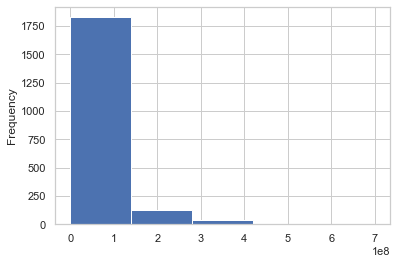

In [138]:
domestic_gross_mean = movie_gross_df['domestic_gross'].mean()
domestic_gross_median = movie_gross_df['domestic_gross'].median()
movie_gross_df['domestic_gross'].plot(kind='hist', bins=5, color='b')

print("Mean Value for domestic_gross column: {}".format(domestic_gross_mean))
print("Median Value for domestic_gross column: {}".format(domestic_gross_median))

From the visualization above, we can see the data has a negative skew. I will proceed to replace the missing values with the median of the column.


In [139]:
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(value=movie_gross_df['domestic_gross'].median)

In [140]:
movie_gross_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Now the missing data has been handled and we proceed to investigate 2 of our main factors using this dataset; Genre and Box Office Earnings. I will further use the movie titles provided with the earnings and try to understand their relationship.

In [141]:
movie_gross_df.dtypes

title              object
studio             object
domestic_gross     object
foreign_gross     float64
year                int64
dtype: object

In [142]:
movie_gross_df['domestic_gross'] = pd.to_numeric(movie_gross_df['domestic_gross'], errors='coerce', downcast='float')

print(movie_gross_df.dtypes)

title              object
studio             object
domestic_gross    float32
foreign_gross     float64
year                int64
dtype: object


In [143]:
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].astype('float64')
print(movie_gross_df.dtypes['domestic_gross'])

float64


In [144]:
movie_gross_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [145]:
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691299968.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300032.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


We now have a cleaned dataset of 2028 rows and 5 columns.
Now that our columns are inorder, I will illustrate the relationship between movie titles and gross earnings. I will do so through data visualization using seaborn as our tool.

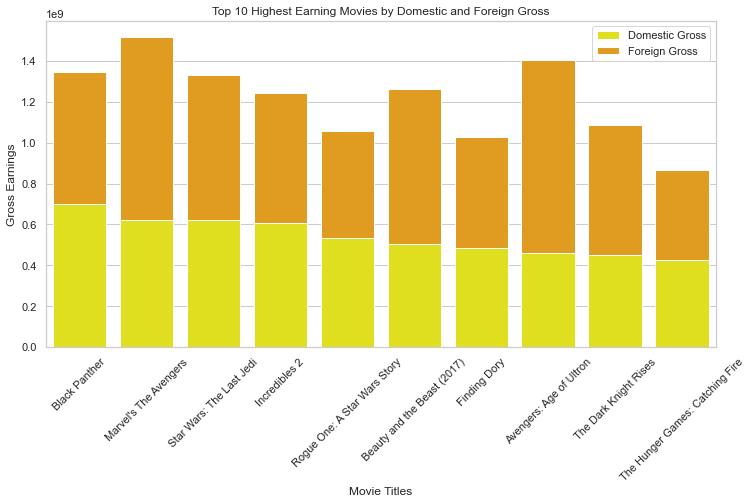

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by total gross (domestic + foreign) in descending order and select the first 10 movies
top_10_earnings = movie_gross_df.sort_values(by=['domestic_gross', 'foreign_gross'], ascending=False).head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Plot the bar chart
sns.barplot(x='title', y='domestic_gross', data=top_10_earnings, color='yellow', label='Domestic Gross')
sns.barplot(x='title', y='foreign_gross', data=top_10_earnings, color='orange', label='Foreign Gross', bottom=top_10_earnings['domestic_gross'])

# Customize the chart
plt.xticks(rotation=45)
plt.xlabel('Movie Titles')
plt.ylabel('Gross Earnings')
plt.title('Top 10 Highest Earning Movies by Domestic and Foreign Gross')
plt.legend()

# Show the chart
plt.show()


From the graph above, we can see that
1. Foreign Gross Income is more than Domestic Gross Income. This is mainly because the international market is often larger than the domestic market for many countries. Other factors include localization where studios produce films with translations accompanied with the films inorder to reach countries that speak other languages.
2. Out of the top 10 movies that do well, Marvel's The Avengers has the most gross revenue. This movie franchise is in the action/adventure genre and because of its well written story, great actors and plot twists that keep viewers itching for more, it is no wonder why it is leading. 
3. Looking at the movies appearing in this list, genres that are frequent are action/adventure/drama etc. 

## Datasets 2&3

In [147]:
file_path = 'zippedData/title.ratings.tsv.gz'
title_ratings_df = pd.read_csv(file_path, sep='\t', compression='gzip', encoding='utf-8')

In [148]:
title_ratings_df

,tconst,averageRating,numVotes
0,tt0000001,5.7,2004
1,tt0000002,5.8,269
2,tt0000003,6.5,1900
3,tt0000004,5.5,178
4,tt0000005,6.2,2685
...,...,...,...
1365199,tt9916730,7.6,11
1365200,tt9916766,7.0,22
1365201,tt9916778,7.2,36
1365202,tt9916840,8.8,6


As seen above, we start with 1365204 rows with 3 columns, where tconst column is a unique identifier for a certain film, with the averageRating being weighted average of all the individual user ratings and, the numVotes being the number of votes the title has received.
The averageRating column has a scale from 1-10 while the numvotes column has no range.

In [149]:
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365204 entries, 0 to 1365203
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1365204 non-null  object 
 1   averageRating  1365204 non-null  float64
 2   numVotes       1365204 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.2+ MB


We can see that there is one float type, one integer type and one object type.

In [150]:
title_ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2004
1,tt0000002,5.8,269
2,tt0000003,6.5,1900
3,tt0000004,5.5,178
4,tt0000005,6.2,2685


In [151]:
title_ratings_df.tail()

,tconst,averageRating,numVotes
1365199,tt9916730,7.6,11
1365200,tt9916766,7.0,22
1365201,tt9916778,7.2,36
1365202,tt9916840,8.8,6
1365203,tt9916880,8.2,6


In [152]:
title_ratings_df.isna().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [153]:
title_ratings_df

,tconst,averageRating,numVotes
0,tt0000001,5.7,2004
1,tt0000002,5.8,269
2,tt0000003,6.5,1900
3,tt0000004,5.5,178
4,tt0000005,6.2,2685
...,...,...,...
1365199,tt9916730,7.6,11
1365200,tt9916766,7.0,22
1365201,tt9916778,7.2,36
1365202,tt9916840,8.8,6


This data set does not contain any missing values and therefore we shall proceed with the next dataframe.

In [154]:
file_path = 'zippedData/title.basics.tsv.gz'


title_basics_df = pd.read_csv(file_path, sep='\t', compression='gzip', encoding='utf-8', low_memory=False)


In [155]:
title_basics_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10277308,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10277309,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10277310,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10277311,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


This dataset has 10277313 rows and 9 columns. We can see that this dataset also contains a similar column like our previous dataset(tsonst). With this, we can combine both columns for further analysis. The primaryTitle is what the movie is famously known as, while the originalTitle is what the movie was initially called by its producers.

In [156]:
title_basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [157]:
title_basics_df.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
10277308,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10277309,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10277310,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10277311,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short
10277312,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Adventure,Animation,Comedy"


In [158]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10277313 entries, 0 to 10277312
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 705.7+ MB


In [159]:
title_basics_df.isna().sum()

tconst             0
titleType          0
primaryTitle      11
originalTitle     11
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            18
dtype: int64

Before I get into the missing values, I will join the 2 datasets since they contain the same alphanumeric unique identifier of the title through concatenation so that I can work on it as one datframe for further analysis.
1. Set the tconst column as the index column for both dataframes.
2. Join using inner join.

In [160]:
title_ratings_df.set_index('tconst', inplace=True)
title_ratings_df.head()

,averageRating,numVotes
tconst,,
tt0000001,5.7,2004
tt0000002,5.8,269
tt0000003,6.5,1900
tt0000004,5.5,178
tt0000005,6.2,2685


In [161]:
title_basics_df.set_index('tconst', inplace=True)
title_basics_df.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


Now that I have the tables loaded correctly, I am going to join title_basics_df with title_ratings_df using the built-in .join() method on the title_basics_df object.

In [162]:
title_basics_with_ratings_df = title_basics_df.join(title_ratings_df, how='inner')
title_basics_with_ratings_df

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2004
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,269
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1900
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.5,178
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2685
...,...,...,...,...,...,...,...,...,...,...
tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama,7.6,11
tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Game-Show,Reality-TV",7.0,22
tt9916778,tvEpisode,Escape,Escape,0,2019,\N,\N,"Crime,Drama,Mystery",7.2,36


After joining both tables, you will note that the rows are 1365204 because from both datasets, only 1365204 records are in both tables with the same unique identifier. I will proceed to cleaning this dataframe now. 

In [163]:
title_basics_with_ratings_df.isna().sum()

titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            3
averageRating     0
numVotes          0
dtype: int64

In [164]:
missing_rows = title_basics_with_ratings_df[title_basics_with_ratings_df['genres'].isna()]
print(missing_rows)
len(missing_rows)

            titleType                                       primaryTitle  \
tconst                                                                     
tt12149332  tvEpisode  Jeopardy! College Championship Semifinal Game ...   
tt28535095  tvEpisode         I'm into Sharif Boys\tI'm into Sharif Boys   
tt3984412   tvEpisode  I'm Not Going to Come Last, I'm Just Going to ...   

           originalTitle isAdult startYear endYear        runtimeMinutes  \
tconst                                                                     
tt12149332             0    2020        \N      \N       Game-Show,Short   
tt28535095             0    2023        \N      \N            Reality-TV   
tt3984412              0    2014        \N      \N  Game-Show,Reality-TV   

           genres  averageRating  numVotes  
tconst                                      
tt12149332    NaN            6.9         8  
tt28535095    NaN            2.7         6  
tt3984412     NaN            8.3         6  


3

Upon further inspection, the three primary title categories with no genre to them do not belong to any movie genre as they are not movies, and so proceeding without them will not affect our analysis in any way.

In [165]:
# Delete rows with missing data in the 'genre' column
title_basics_with_ratings_df.dropna(subset=['genres'], inplace=True)

# Print the DataFrame after removing rows with missing data
print(title_basics_with_ratings_df)

           titleType                primaryTitle               originalTitle  \
tconst                                                                         
tt0000001      short                  Carmencita                  Carmencita   
tt0000002      short      Le clown et ses chiens      Le clown et ses chiens   
tt0000003      short              Pauvre Pierrot              Pauvre Pierrot   
tt0000004      short                 Un bon bock                 Un bon bock   
tt0000005      short            Blacksmith Scene            Blacksmith Scene   
...              ...                         ...                         ...   
tt9916730      movie                      6 Gunn                      6 Gunn   
tt9916766  tvEpisode              Episode #10.15              Episode #10.15   
tt9916778  tvEpisode                      Escape                      Escape   
tt9916840  tvEpisode  Horrid Henry's Comic Caper  Horrid Henry's Comic Caper   
tt9916880  tvEpisode   Horrid Henry Know

In [166]:
title_basics_with_ratings_df.isna().sum()

titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
dtype: int64

Now that all missing values have been dealt with, I will filter out the movies from the titleType column then proceed to delete the duplicate primaryTitles.

In [167]:
title_basics_with_ratings_df.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2004
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,269
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1900
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.5,178
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2685


In [168]:
# Filter rows where 'titleType' is 'movie'
filtered_df = title_basics_with_ratings_df[title_basics_with_ratings_df['titleType'] == 'movie']

In [169]:
filtered_df

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,207
tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.3,484
tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.1,15
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,854
tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.0,21
...,...,...,...,...,...,...,...,...,...,...
tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1446
tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",6.4,5592
tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.5,17


In [170]:
title_basics_with_ratings_df = title_basics_with_ratings_df[title_basics_with_ratings_df['titleType'] == 'movie']


The above function will maintain only titletypes that are movies, which is the main focus of our business problem. 

In [171]:
title_basics_with_ratings_df

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,207
tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.3,484
tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.1,15
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,854
tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.0,21
...,...,...,...,...,...,...,...,...,...,...
tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1446
tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",6.4,5592
tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.5,17


In [172]:
title_basics_with_ratings_df = title_basics_with_ratings_df.drop_duplicates(subset='primaryTitle')


In [173]:
title_basics_with_ratings_df

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,207
tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.3,484
tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.1,15
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,854
tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.0,21
...,...,...,...,...,...,...,...,...,...,...
tt9916190,movie,Safeguard,Safeguard,0,2020,\N,95,"Action,Adventure,Thriller",3.7,245
tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1446
tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.5,17


Before proceeding to the gross earnings from the movies, I will inspect the relationship between
1. Genres and averageRating
2. Genres and numVotes

In [174]:
unique_genres = title_basics_with_ratings_df['genres'].unique()

# Print all unique genres
for genre in unique_genres[:30]:
    print(genre)



Romance
Documentary,News,Sport
\N
Action,Adventure,Biography
Drama
Adventure,Fantasy
Comedy
Drama,War
Crime
Drama,Romance
Adventure,Drama
Biography,Drama,Family
Drama,History
War
Biography,Drama,History
Sci-Fi
Adventure,Drama,Fantasy
Biography,Drama
Documentary,War
Biography,Drama,Romance
History,War
Action,Drama,Thriller
Crime,Thriller
Adventure
Drama,Thriller
Western
Crime,Drama,Romance
Crime,Drama
Documentary
Comedy,Fantasy


Since the genres have too many types per movie, I will focus on the average rating and number of votes instead, then pick out the top movies. 

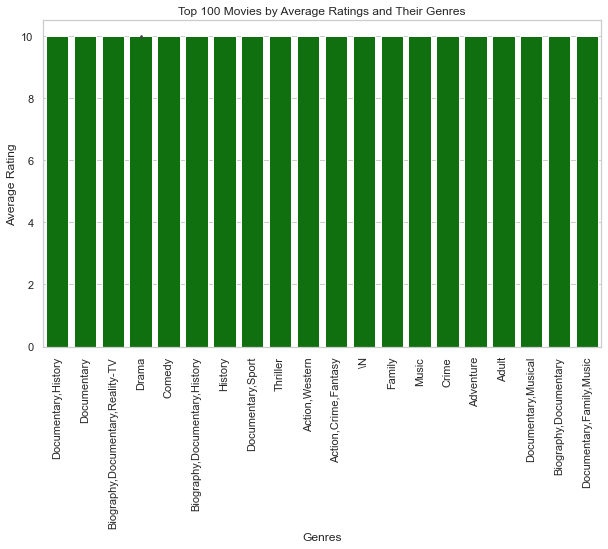

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by ratings in descending order and select the top 10 movies
top_100_movies = title_basics_with_ratings_df.sort_values(by='averageRating', ascending=False).head(100)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the bar chart
sns.barplot(x='genres', y='averageRating', data=top_100_movies, color='green')

# Customize the chart
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Top 100 Movies by Average Ratings and Their Genres')

# Show the chart
plt.show()


From the above chart, we note that
1. The genres with the the highest weighted average ratings are for instance Documentaries, Dramas, Comedies, Family etc. With this category, it means that the more significant opinions rated the  content favorably inorder for them to have a highest weighted averages.
2. Seeing that most categories shown above have a figure of 10, it means that most, if not all categories can have a high weighted average rating. This also means that there are other factors which contribute to the success of a movie despite which genre it falls under. This could be factors such as how well written a story is, the cast involved in the movie, the release dates etc.

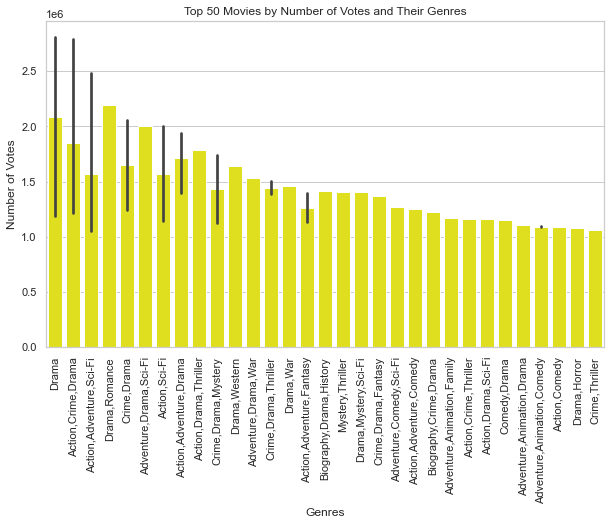

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by numVotes in descending order and select the top 10 movies
top_50_movies = title_basics_with_ratings_df.sort_values(by='numVotes', ascending=False).head(50)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the bar chart
sns.barplot(x='genres', y='numVotes', data=top_50_movies, color='yellow')

# Customize the chart
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of Votes')
plt.title('Top 50 Movies by Number of Votes and Their Genres')

# Show the chart
plt.show()



Again, we see that a wider variety of movies appear here, with Drama appearing the most amount of times. Action, Adventure appear frequently as well. These are the genres which have done well the most according to our graph. The appearnce of the blacklines show the confidence intervals, which are used to convey the uncertainty or variability associated with the data. This could be caused by the presence of the many genre groups as shown above by the unique figures. However, this does not hinder us to see which genres are appearing at the top of our list. 

### Combining All Datasets

From the source of these datasets(https://developer.imdb.com/non-commercial-datasets/), the primary title and the original title are similar, and in the first data set it only contains one column for the movie titles. Therefore, I will choose the primary title, rename it to title, then set it as the index for both datasets, combine them and have one final dataset for final exploration.

In [177]:
# Change the column title
title_basics_with_ratings_df = title_basics_with_ratings_df.rename(columns={'primaryTitle': 'title'})


In [178]:
title_basics_with_ratings_df

,titleType,title,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,207
tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.3,484
tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.1,15
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,854
tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.0,21
...,...,...,...,...,...,...,...,...,...,...
tt9916190,movie,Safeguard,Safeguard,0,2020,\N,95,"Action,Adventure,Thriller",3.7,245
tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1446
tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.5,17


In [179]:
movie_gross_df.set_index('title', inplace=True)
movie_gross_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010
Alice in Wonderland (2010),BV,334200000.0,691299968.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300032.0,2010
Inception,WB,292600000.0,535700000.0,2010
Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [180]:
title_basics_with_ratings_df.set_index('title', inplace=True)
title_basics_with_ratings_df.head()

,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
title,,,,,,,,,
Miss Jerry,movie,Miss Jerry,0,1894,\N,45,Romance,5.3,207
The Corbett-Fitzsimmons Fight,movie,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.3,484
Bohemios,movie,Bohemios,0,1905,\N,100,\N,4.1,15
The Story of the Kelly Gang,movie,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,854
The Prodigal Son,movie,L'enfant prodigue,0,1907,\N,90,Drama,5.0,21


### Final Dataset

In [181]:
title_basics_with_ratings_moviegross_df = title_basics_with_ratings_df.join(movie_gross_df, how='inner')
title_basics_with_ratings_moviegross_df

,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,studio,domestic_gross,foreign_gross,year
title,,,,,,,,,,,,,
Robin Hood,movie,Robin Hood,0,1913,\N,\N,Adventure,5.7,55,Uni.,105300000.0,216400000.0,2010
Anna Karenina,movie,Anna Karenina,0,1914,\N,\N,Drama,5.2,26,Focus,12800000.0,56100000.0,2012
Jane Eyre,movie,Jane Eyre,0,1914,\N,50,Drama,7.5,20,Focus,11200000.0,23500000.0,2011
The Woman in Black,movie,The Woman in Black,0,1914,\N,55,"Drama,Romance",5.2,45,CBS,54300000.0,73400000.0,2012
Butter,movie,Butter,0,1916,\N,\N,\N,6.6,12,RTWC,105000.0,70700.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Soorma,movie,Soorma,0,2018,\N,131,"Biography,Drama,Sport",7.3,5496,Sony,390000.0,6200000.0,2018
Detective Chinatown 2,movie,Tang ren jie tan an 2,0,2018,\N,121,"Action,Comedy,Mystery",6.1,2991,WB,2000000.0,542099968.0,2018
Hereditary,movie,Hereditary,0,2018,\N,127,"Drama,Horror,Mystery",7.3,358863,A24,44100000.0,35300000.0,2018


In [182]:
title_basics_with_ratings_moviegross_df.head(20)

,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,studio,domestic_gross,foreign_gross,year
title,,,,,,,,,,,,,
Robin Hood,movie,Robin Hood,0,1913,\N,\N,Adventure,5.7,55,Uni.,105300000.0,216400000.0,2010
Anna Karenina,movie,Anna Karenina,0,1914,\N,\N,Drama,5.2,26,Focus,12800000.0,56100000.0,2012
Jane Eyre,movie,Jane Eyre,0,1914,\N,50,Drama,7.5,20,Focus,11200000.0,23500000.0,2011
The Woman in Black,movie,The Woman in Black,0,1914,\N,55,"Drama,Romance",5.2,45,CBS,54300000.0,73400000.0,2012
Butter,movie,Butter,0,1916,\N,\N,\N,6.6,12,RTWC,105000.0,70700.0,2012
The Dictator,movie,The Dictator,0,1915,\N,\N,"Adventure,Romance",7.7,47,Par.,59700000.0,119700000.0,2012
The Immigrant,movie,The Immigrant,0,1915,\N,60,Drama,7.3,44,Wein.,2000000.0,3800000.0,2014
The Raven,movie,The Raven,0,1915,\N,57,"Biography,Drama",5.4,119,Rela.,16000000.0,13600000.0,2012
One Day,movie,One Day,0,1916,\N,\N,"Adventure,Drama,Romance",6.0,21,Focus,13800000.0,45500000.0,2011


In [183]:
title_basics_with_ratings_moviegross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1642 entries, Robin Hood to Burn the Stage: The Movie
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titleType       1642 non-null   object 
 1   originalTitle   1642 non-null   object 
 2   isAdult         1642 non-null   object 
 3   startYear       1642 non-null   object 
 4   endYear         1642 non-null   object 
 5   runtimeMinutes  1642 non-null   object 
 6   genres          1642 non-null   object 
 7   averageRating   1642 non-null   float64
 8   numVotes        1642 non-null   int64  
 9   studio          1642 non-null   object 
 10  domestic_gross  1622 non-null   float64
 11  foreign_gross   1642 non-null   float64
 12  year            1642 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 179.6+ KB


After combining all three datasets, we have 1642 entries and 13 columns, and we shall use this dataset to investigate the earnings and the genres.

First, let us inspect the relationship between genres and the gross reveneue. I will present which genres bring in the most gross revenue by using both domestic and foreign gross columns.I will do this through the use of a stacked bar chart together with the Seaborn library. But first, let us group by the genres and both gross revenues. Because the dataset is too large, we shall pick the top 20 genres with the highest earnings.

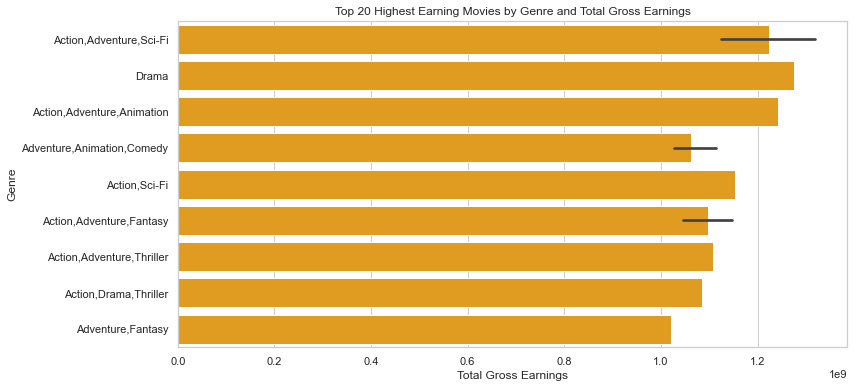

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by total gross (domestic + foreign) in descending order and select the first 10 movies
top_20_earnings = title_basics_with_ratings_moviegross_df.assign(Total_Gross=title_basics_with_ratings_moviegross_df['domestic_gross'] + title_basics_with_ratings_moviegross_df['foreign_gross']).nlargest(20, 'Total_Gross')

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Plot the bar chart
sns.barplot(x='Total_Gross', y='genres', data=top_20_earnings, color='orange')

# Customize the chart
plt.xlabel('Total Gross Earnings')
plt.ylabel('Genre')
plt.title('Top 20 Highest Earning Movies by Genre and Total Gross Earnings')

# Show the chart
plt.show()


From the above chart where we have added both gross incomes. The earnings are in terms of billions. We see that the top genres that bring in the most income are Action, Adventure, Sci-Fi, Drama and Animation. Referring to the previous charts, we can infer that movies that receive more number of votes are bound to do well. This is proven by the fact that similar categories are appearing at the top.

## Evaluation

From this analysis, we can see that movies tend to bring in more income from foreign countries than locally. We also see that it is quite possible for any genre to do well in the industry, depending on various factors beyond the ones we have looked into. We also see that some of the best genres that have earned billions are Animations, Dramas, Sci-Fi, Adventures and Action movies. While higher number of votes can indicate a movie's popularity and potential for success, this is just one aspect. There are other factors that contribute to the overall success of a movie.

## Conclusions

This analysis leads to three recommendations for Microsoft to do well in this industry;

1. Microsoft should gain a clear understanding of audience preferences at the beginning. Since the bigger audience is international, it needs to study the audience and translate this into the movies like themes and having film subtitles accompanied with the movies. This also translates to being culture sensitive so that the organization can reach a wider audience and be able to return more.
2. Microsoft should look into Animations, Dramas, Sci-Fi, Adventures and Action movies, as they have proven to be the genres with the highest ratings and most income. However, a successful genre is usually backed by a very good story. Therefore, the organization should invest in world class writes and producers to make these genres successful.
3. Since this is the start of a new venture for Microsoft, at least half of its success would be based on Marketing and Promotion.  Effective marketing and promotion strategies can significantly impact a movie's success and generate buzz and attract viewers, leading to higher vote counts.

This analysis has only touched on a few factors such as genres, total gross revenue, number of votes and weighter average ratings. Because of this, the problem is not fully solved. More factors that need to be analyzed and also contribute to the performance of a movie studio include Movie Release Timing, Budget Allocation, Film Industry Trends, Cast and Critical Reviews.